(0, 100)

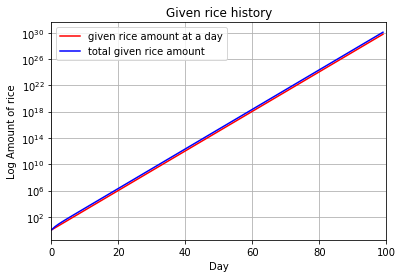

In [38]:
"""
100日後の米粒の数
"""
import matplotlib.pyplot as plt
%matplotlib inline

MAX_DAY_COUNT = 100 #days
given_rice_at_a_day = 1 #The rice given by Hideyoshi at a day. The value is being double day by day
total_given_rice = 1 #Total amount
list_rice_amount_history = [given_rice_at_a_day]    #set initial value (day1)
list_total_rice_amount_history = [total_given_rice] #set initial value (day1)

for _ in range(1, MAX_DAY_COUNT): #Loop start from day2
    given_rice_at_a_day *=2
    total_given_rice += given_rice_at_a_day
    list_rice_amount_history.append(given_rice_at_a_day)
    list_total_rice_amount_history.append(total_given_rice)

plt.title("Given rice history")
plt.xlabel("Day")
plt.ylabel("Log Amount of rice")
plt.plot(list_rice_amount_history, color='red', label='given rice amount at a day')
plt.plot(list_total_rice_amount_history, color='blue', label='total given rice amount')
plt.grid(which="both")
plt.yscale("log")
plt.legend(loc = 'upper left')
plt.xlim([0,MAX_DAY_COUNT])

(0, 100)

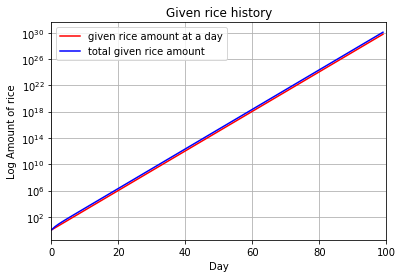

In [39]:
"""
関数化
"""

def compute_sorori_shinzaemon(day=100):
    """
    曽呂利新左衛門の米の逸話を検証する関数。日にちごとの米の粒の数を計算する。

    Parameteres
    --------------
    day: int
        米を貰う日数 (default : 100)

    Returns
    --------------
    list_n_grains : list
        ある日に貰う米の数のリスト（リストの長さはdayに等しくなる）
    list_total_grains : list
        ある日までに累計で貰う米の数のリスト（リストの長さはdayに等しくなる）
    """
    
    given_rice_at_a_day = 1 #The rice given by Hideyoshi at a day. The value is being double day by day
    total_given_rice = 1 #Total amount
    list_n_grains = [given_rice_at_a_day]    #set initial value (day1)
    list_total_grains = [total_given_rice] #set initial value (day1)

    for _ in range(1, day): #Loop start from day2
        given_rice_at_a_day *=2
        total_given_rice += given_rice_at_a_day
        list_n_grains.append(given_rice_at_a_day)
        list_total_grains.append(total_given_rice)

    return list_n_grains, list_total_grains

#Call function
list_n_grains, list_total_grains = compute_sorori_shinzaemon(day=100)

plt.title("Given rice history")
plt.xlabel("Day")
plt.ylabel("Log Amount of rice")
plt.plot(list_n_grains, color='red', label='given rice amount at a day')
plt.plot(list_total_grains, color='blue', label='total given rice amount')
plt.grid(which="both")
plt.yscale("log")
plt.legend(loc = 'upper left')
plt.xlim([0,100])

In [35]:
"""
何人が何日間生活（生存）できるか？
"""

def cal_survival_days(num_of_people, amount_of_rice):
    """
    Parameters
    ---------------------
    num_of_people  :int　人数
    amount_of_rice :int　米の量（米粒の数）
    ---------------------
    
    Return
    ---------------------
    survival_days :int 生存可能期間
    ---------------------
    """
    
    REQUIRED_CALORIE_PER_DAY_PER_PERSON = 2000 #kcal　Google調べ 
    RICE_CALORIE_PER_BOWL = 250 #kcal　Google調べ
    RICE_AMOUNT_PER_BOWL = 3200 #Google調べ
    #１日当たりに必要なカロリーを全て米で摂取するとして１人当たり１日に必要な米の量を計算
    REQUIRED_RICE_AMOUNT_PER_PERSON_PER_DAY = REQUIRED_CALORIE_PER_DAY_PER_PERSON/RICE_CALORIE_PER_BOWL*RICE_AMOUNT_PER_BOWL
    #米量を１人当たり１日に必要な米の量と人数で割って生存可能日数を計算
    survival_days = amount_of_rice/num_of_people/REQUIRED_RICE_AMOUNT_PER_PERSON_PER_DAY
    
    return survival_days

#call function
NUM_OF_PEOPLE = 9
DAYS = 120
list_n_grains, list_total_grains = compute_sorori_shinzaemon(day=DAYS)
survival_days = cal_survival_days(NUM_OF_PEOPLE, list_total_grains[-1])

print("受講期間{}日中にもらえる米の量で受講者{}人が生存できる日数：{:.2e}日".format(DAYS,NOM_OF_PEOPLE,survival_days))

受講期間120日中にもらえる米の量で受講者9人が生存できる日数：5.77e+30日
